In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'insurance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Let's start by preparing the data, handling missing values, outliers, and scaling the data where necessary

In [4]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Checking basic statistics for outliers and understanding the distribution
basic_stats = data.describe()

missing_values, basic_stats


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

# Let's start with visualizing the distribution of BMI and charges

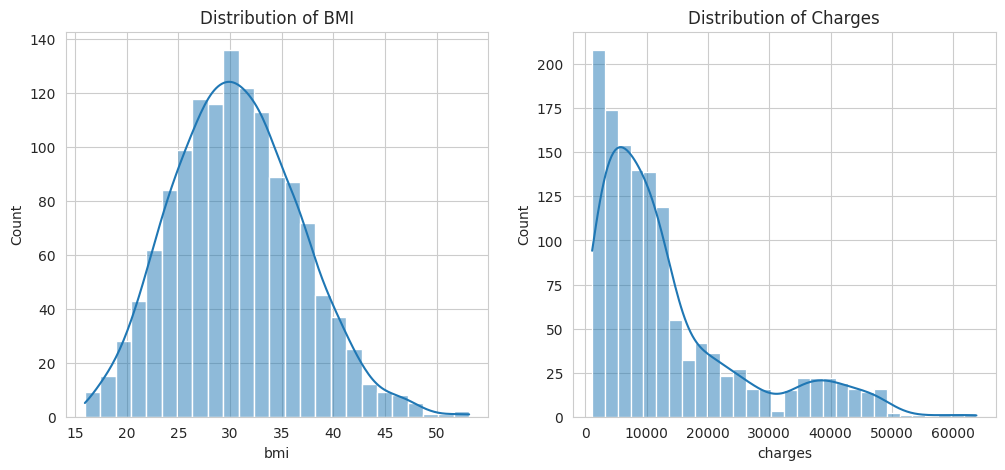

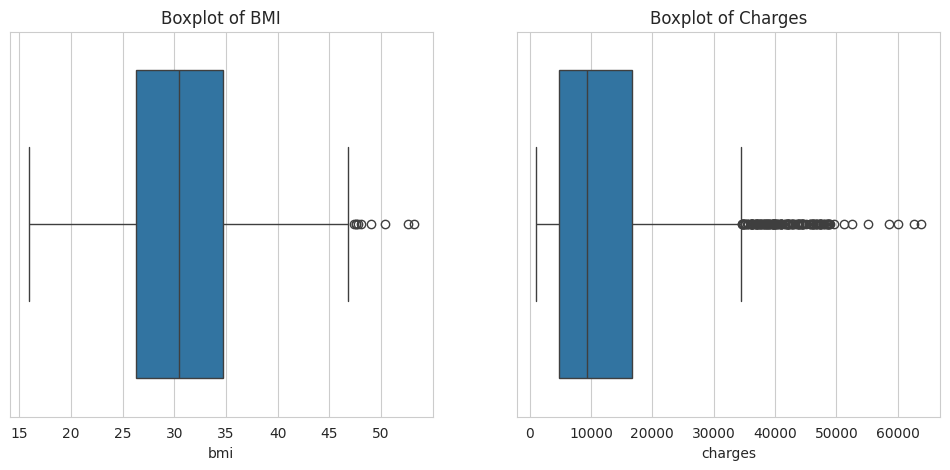

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of BMI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['bmi'], kde=True)
plt.title('Distribution of BMI')

# Plotting the distribution of Charges
plt.subplot(1, 2, 2)
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')

plt.show()

# Visualizing the boxplot to identify outliers in BMI and Charges
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['bmi'])
plt.title('Boxplot of BMI')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['charges'])
plt.title('Boxplot of Charges')

plt.show()


The visualizations reveal the following insights:

BMI Distribution:

The BMI distribution appears to be roughly normal but slightly right-skewed.
There are a few outliers present, as shown in the boxplot.
Charges Distribution:

The distribution of charges is highly right-skewed, with a long tail extending towards higher values. This suggests that a small number of individuals incur very high medical costs.
There are significant outliers in the charges data, which is expected given the nature of medical expenses.

# Correlation. let's encode the categorical variables (sex, smoker, region), check for correlations among the numerical variables

In [6]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check correlation among numerical variables
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
correlation_matrix['charges'].sort_values(ascending=False)

,charges
charges,1.000000
smoker_yes,0.787251
age,0.299008
bmi,0.198341
region_southeast,0.073982
children,0.067998
sex_male,0.057292
region_northwest,-0.039905
region_southwest,-0.043210


# let's build a linear regression model using these features and evaluate its performance.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features and target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(33596915.85136145, 5796.284659276273, 4181.19447375365, 0.7835929767120724)

# Let's build a Gradient boost Regressor for prediction

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, rmse_gbr, mae_gbr, r2_gbr



(18745176.47586223, 4329.570010504765, 2443.483262376879, 0.8792571359795264)

# Creating a comparision table for linear regression and gradient boost regressor

In [11]:
# Creating a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Linear Regression': [mse, rmse, mae, r2],
    'Gradient Boosting Regressor': [mse_gbr, rmse_gbr, mae_gbr, r2_gbr]
})

# Display the comparison table
comparison_table

# Assuming 'comparison_table' is your original DataFrame
comparison_table_rounded = comparison_table.copy()

# Rounding to two decimal places for MSE, RMSE, MAE, and R² values
comparison_table_rounded['Linear Regression'] = comparison_table_rounded['Linear Regression'].round(2)
comparison_table_rounded['Gradient Boosting Regressor'] = comparison_table_rounded['Gradient Boosting Regressor'].round(2)

# Display the rounded comparison table
comparison_table_rounded


,Metric,Linear Regression,Gradient Boosting Regressor
0,MSE,33596915.85,18745176.48
1,RMSE,5796.28,4329.57
2,MAE,4181.19,2443.48
3,R²,0.78,0.88
